In [4]:
import numpy as np
import landlab
from landlab import RasterModelGrid
from landlab.io import read_esri_ascii
from landlab.plot.imshow import imshow_grid

# sums up cell areas or given runoff volume along the flow directions
from landlab.components import FlowAccumulator
# fills depressions along the flow path
from landlab.components import DepressionFinderAndRouter
# reports drainage area or flow volume of a grid
from landlab.components.flow_accum import find_drainage_area_and_discharge

In [6]:
(mg,z) = read_esri_ascii("test.asc", name='topographic__elevation')
mg.at_node.keys()

['topographic__elevation']

In [7]:
mg.set_watershed_boundary_condition(z)

ValueError: zero-size array to reduction operation minimum which has no identity

In [56]:
fa = FlowAccumulator(mg,
                     surface='topographic__elevation',
                     flow_director='FlowDirectorD8',
                     runoff_rate=0.01, # suppose there is 1 cm runoff generated in all grid cells
                     depression_finder='DepressionFinderAndRouter')

In [57]:
(drainage_area, discharge) = fa.accumulate_flow()

In [8]:
S = mg.calc_slope_at_node(z)   # let's call this a slope field and add it to the grid
_=mg.add_field('node','Slope',S, clobber=True)  

In [10]:
imshow_grid(mg,'surface_water__discharge', plot_name = 'Discharge')

TypeError: unable to determine location of values, use 'at' keyword

In [11]:
mg.at_node.keys()

['topographic__elevation', 'Slope']

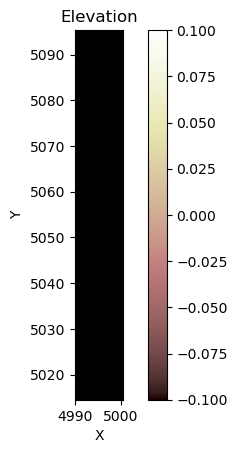

In [12]:
imshow_grid(mg,'topographic__elevation',plot_name='Elevation')